# Different  MLP Arcitectures on MNIST dataset

## Loading data 

In [2]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal

Using TensorFlow backend.


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid(True)
    fig.canvas.draw()

In [4]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [5]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [7]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [8]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [10]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 

# some model parameters
output_dim = 10
input_dim = X_train.shape[1]

batch_size = 128 
nb_epoch = 20

## [1] MLP with 2 hidden layers

### [ 1.1] Without Batch Normalization and Dropout

In [15]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 364)               285740    
_________________________________________________________________
dense_5 (Dense)              (None, 52)                18980     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                530       
Total params: 305,250
Trainable params: 305,250
Non-trainable params: 0
_________________________________________________________________


In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 86us/step - loss: 0.2741 - acc: 0.9213 - val_loss: 0.1435 - val_acc: 0.9563
Epoch 2/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.1041 - acc: 0.9690 - val_loss: 0.0936 - val_acc: 0.9729
Epoch 3/20
60000/60000 [==============================] - 4s 74us/step - loss: 0.0665 - acc: 0.9796 - val_loss: 0.0862 - val_acc: 0.9755
Epoch 4/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0468 - acc: 0.9855 - val_loss: 0.0678 - val_acc: 0.9787
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0343 - acc: 0.9892 - val_loss: 0.0663 - val_acc: 0.9803
Epoch 6/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.0247 - acc: 0.9924 - val_loss: 0.0746 - val_acc: 0.9777
Epoch 7/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.0221 - acc: 0.9933 - val_loss: 0.0642 - val_acc

Test score: 0.09650619211766216
Test accuracy: 0.9793


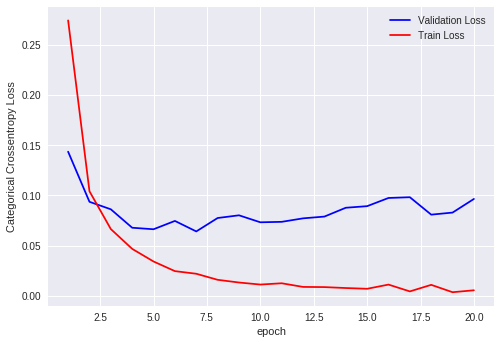

In [18]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


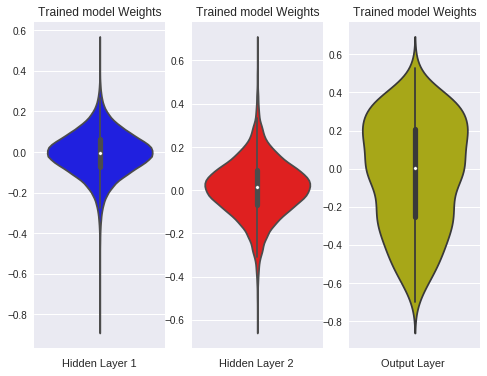

In [19]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### [1.2] With Batch Normalization and Dropout

In [21]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())                 
model.add(Dropout(0.5))
model.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 364)               285740    
_________________________________________________________________
batch_normalization_1 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_1 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 52)                18980     
_________________________________________________________________
batch_normalization_2 (Batch (None, 52)                208       
_________________________________________________________________
dropout_2 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                530       
Total para

In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.5517 - acc: 0.8330 - val_loss: 0.1736 - val_acc: 0.9462
Epoch 2/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.2584 - acc: 0.9258 - val_loss: 0.1278 - val_acc: 0.9600
Epoch 3/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.2003 - acc: 0.9423 - val_loss: 0.1044 - val_acc: 0.9666
Epoch 4/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.1691 - acc: 0.9502 - val_loss: 0.0951 - val_acc: 0.9706
Epoch 5/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1487 - acc: 0.9580 - val_loss: 0.0830 - val_acc: 0.9750
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1339 - acc: 0.9607 - val_loss: 0.0770 - val_acc: 0.9758
Epoch 7/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.1257 - acc: 0.9637 - val_loss: 0.0756 - val_ac

Test score: 0.06447895890461514
Test accuracy: 0.9819


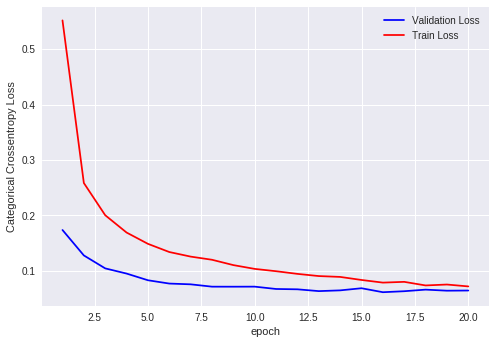

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


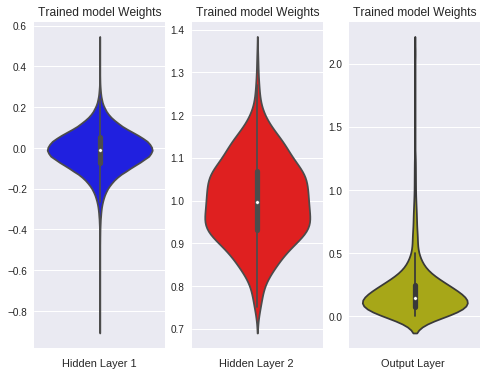

In [24]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## [2] MLP with 3 hidden layers

### [2.1] Without Batch Normalization and Dropout

In [25]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(392, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(196, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(98, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 392)               307720    
_________________________________________________________________
dense_11 (Dense)             (None, 196)               77028     
_________________________________________________________________
dense_12 (Dense)             (None, 98)                19306     
_________________________________________________________________
dense_13 (Dense)             (None, 10)                990       
Total params: 405,044
Trainable params: 405,044
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 102us/step - loss: 0.2474 - acc: 0.9268 - val_loss: 0.1271 - val_acc: 0.9592
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0884 - acc: 0.9727 - val_loss: 0.0834 - val_acc: 0.9732
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0570 - acc: 0.9820 - val_loss: 0.0759 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0415 - acc: 0.9869 - val_loss: 0.0653 - val_acc: 0.9793
Epoch 5/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0305 - acc: 0.9900 - val_loss: 0.0713 - val_acc: 0.9800
Epoch 6/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0247 - acc: 0.9919 - val_loss: 0.0776 - val_acc: 0.9788
Epoch 7/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0207 - acc: 0.9929 - val_loss: 0.0804 - val_ac

Test score: 0.08915272126807804
Test accuracy: 0.9828


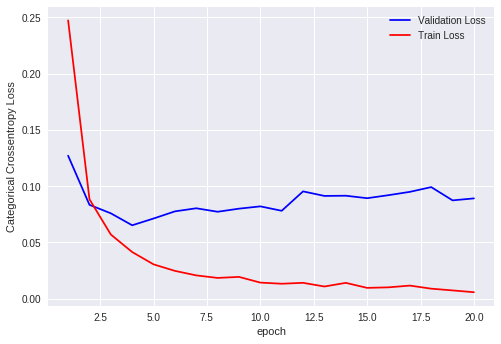

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


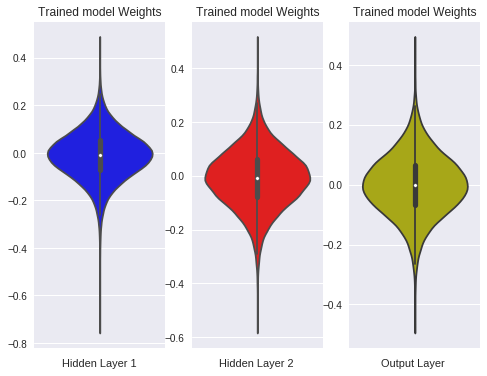

In [28]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### [2.2] With Batch Normalization and Dropout

In [29]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(364, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())                 
model.add(Dropout(0.5))
model.add(Dense(52, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 364)               285740    
_________________________________________________________________
batch_normalization_3 (Batch (None, 364)               1456      
_________________________________________________________________
dropout_3 (Dropout)          (None, 364)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 52)                18980     
_________________________________________________________________
batch_normalization_4 (Batch (None, 52)                208       
_________________________________________________________________
dropout_4 (Dropout)          (None, 52)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                3392      
__________

In [31]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.8095 - acc: 0.7476 - val_loss: 0.2088 - val_acc: 0.9344
Epoch 2/20
60000/60000 [==============================] - 6s 107us/step - loss: 0.3403 - acc: 0.9033 - val_loss: 0.1457 - val_acc: 0.9562
Epoch 3/20
60000/60000 [==============================] - 6s 106us/step - loss: 0.2610 - acc: 0.9285 - val_loss: 0.1263 - val_acc: 0.9634
Epoch 4/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.2190 - acc: 0.9390 - val_loss: 0.1025 - val_acc: 0.9711
Epoch 5/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1953 - acc: 0.9472 - val_loss: 0.0967 - val_acc: 0.9721
Epoch 6/20
60000/60000 [==============================] - 6s 105us/step - loss: 0.1848 - acc: 0.9492 - val_loss: 0.0968 - val_acc: 0.9724
Epoch 7/20
60000/60000 [==============================] - 6s 104us/step - loss: 0.1687 - acc: 0.9546 - val_loss: 0.0914 - 

Test score: 0.07640664648028324
Test accuracy: 0.9795


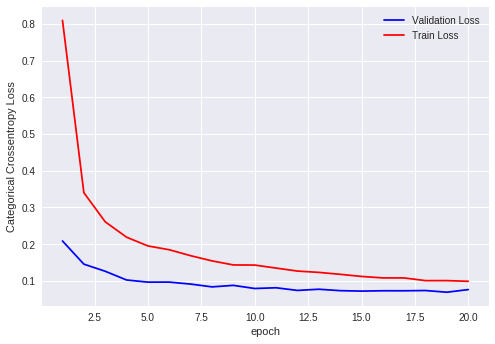

In [32]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


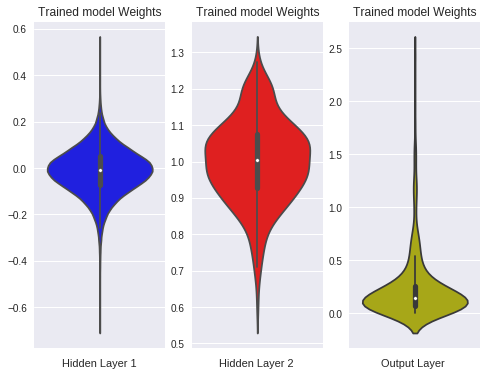

In [33]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

## [2] MLP with 5 hidden layers

### [3.1] Without Batch Normalization and Dropout

In [34]:
# Multilayer perceptron

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_19 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_20 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_23 (Dense)             (None, 10)                330       
Total params: 576,810
Trainable params: 576,810
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 142us/step - loss: 0.3075 - acc: 0.9062 - val_loss: 0.1160 - val_acc: 0.9641
Epoch 2/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0998 - acc: 0.9698 - val_loss: 0.1045 - val_acc: 0.9681
Epoch 3/20
60000/60000 [==============================] - 8s 129us/step - loss: 0.0650 - acc: 0.9800 - val_loss: 0.0769 - val_acc: 0.9760
Epoch 4/20
60000/60000 [==============================] - 8s 137us/step - loss: 0.0453 - acc: 0.9860 - val_loss: 0.0769 - val_acc: 0.9772
Epoch 5/20
60000/60000 [==============================] - 8s 139us/step - loss: 0.0388 - acc: 0.9875 - val_loss: 0.0905 - val_acc: 0.9762
Epoch 6/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0311 - acc: 0.9901 - val_loss: 0.0786 - val_acc: 0.9794
Epoch 7/20
60000/60000 [==============================] - 8s 132us/step - loss: 0.0260 - acc: 0.9920 - val_loss: 0.0770 - 

Test score: 0.10602583270173854
Test accuracy: 0.9785


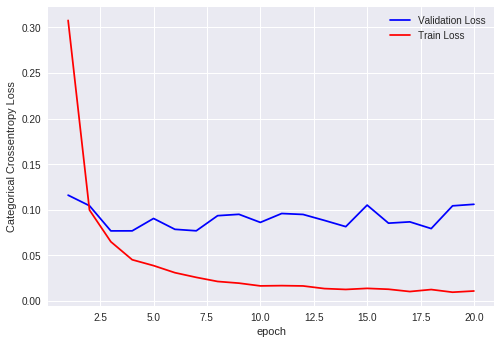

In [36]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


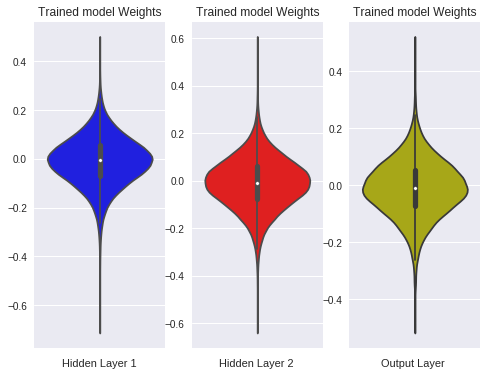

In [37]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)

fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

### [3.2] With Batch Normalization and Dropout

In [38]:
from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())                 
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.062, seed=None)))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(output_dim, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               401920    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dropout_7 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               32896     
__________

In [39]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 224us/step - loss: 1.2762 - acc: 0.5948 - val_loss: 0.2912 - val_acc: 0.9224
Epoch 2/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.5094 - acc: 0.8618 - val_loss: 0.1788 - val_acc: 0.9523
Epoch 3/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.3592 - acc: 0.9095 - val_loss: 0.1466 - val_acc: 0.9610
Epoch 4/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.2985 - acc: 0.9285 - val_loss: 0.1363 - val_acc: 0.9660
Epoch 5/20
60000/60000 [==============================] - 11s 188us/step - loss: 0.2592 - acc: 0.9387 - val_loss: 0.1195 - val_acc: 0.9697
Epoch 6/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2315 - acc: 0.9456 - val_loss: 0.1222 - val_acc: 0.9695
Epoch 7/20
60000/60000 [==============================] - 11s 190us/step - loss: 0.2225 - acc: 0.9487 - val_loss: 0.

Test score: 0.08005840601597447
Test accuracy: 0.9819


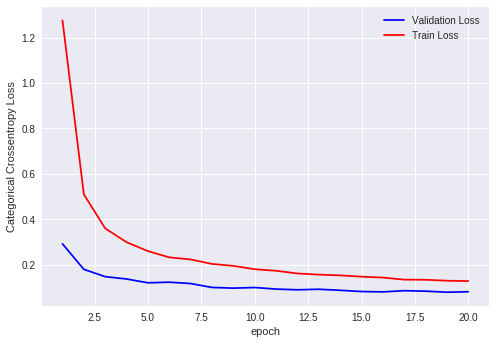

In [40]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


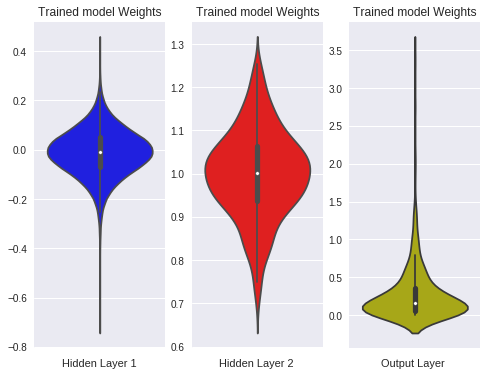

In [41]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure(figsize=(8, 6))
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

In [47]:
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MLP_MODEL", "TRAIN_ACCURACY", "TEST_ACCURACY"]
x.add_row(["MLP(2-hidden layers)", 0.870, 0.875])
x.add_row(["MLP(2-hidden layers) With Dropout and Batch Normalization", 0.978, 0.981])
x.add_row(["MLP(3-hidden layers)", 0.998, 0.982])
x.add_row(["MLP(3-hidden layers) With Dropout and Batch Normalization", 0.972, 0.979])
x.add_row(["MLP(5-hidden layers)", 0.996, 0.978])
x.add_row(["MLP(5-hidden layers) With Dropout and Batch Normalization", 0.971, 0.981])

print('\t\t\t\tMLP WITH DIFFERNET ARCHITECTURES')
print(x)

				MLP WITH DIFFERNET ARCHITECTURES
+-----------------------------------------------------------+----------------+---------------+
|                         MLP_MODEL                         | TRAIN_ACCURACY | TEST_ACCURACY |
+-----------------------------------------------------------+----------------+---------------+
|                    MLP(2-hidden layers)                   |      0.87      |     0.875     |
| MLP(2-hidden layers) With Dropout and Batch Normalization |     0.978      |     0.981     |
|                    MLP(3-hidden layers)                   |     0.998      |     0.982     |
| MLP(3-hidden layers) With Dropout and Batch Normalization |     0.972      |     0.979     |
|                    MLP(5-hidden layers)                   |     0.996      |     0.978     |
| MLP(5-hidden layers) With Dropout and Batch Normalization |     0.971      |     0.981     |
+-----------------------------------------------------------+----------------+---------------+


# Conclusion

   1. The Best train and test (0.998 | 0.982) accuracy is obtained by MLP(3-hidden layers) without Dropout and Batch Normalization.
   2. With Dropout and Batch Normalization the NN is less overfitted than the NN without Dropout and Batch Normalization.